## This notebook is my work for how I decontaminate the images from the MWA (Murchison Widefield Array)

In [1]:
import numpy as np
import scipy as sc
import os
import matplotlib.pyplot as plt

# Loading the Data

### The next four cells are how I easily load in data from my directory. This code is inspired by the pyuv data tutorial. 
Each observation has a set of files so I give the "prefix" or the constant part of the path and then use a for loop that attaches the not constant part of the file to the path. This just cleans it up a bit and saves me from copying and pasting meticulusly. Each observation night was chosen because when looking at the images from those nights there appeared to be some bright RFI

#### This data is the with SSINS

In [2]:
#Observation 1321444384
data_prefix1_ws = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321444384_cubeXX__even_odd_joint_noimgclip_'
files_384_ws = [data_prefix1_ws + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [3]:
#Observation 1321445584
data_prefix2_ws = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321445584_cubeXX__even_odd_joint_noimgclip_'
files_584_ws = [data_prefix2_ws + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [4]:
#Observation 1321445704
data_prefix3_ws = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321445704_cubeXX__even_odd_joint_noimgclip_'
files_704_ws = [data_prefix3_ws + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [5]:
#Observation 1321446904
data_prefix4_ws = '/Volumes/data1/CatZamora/data/with_ssins/uvf_cubes/1321446904_cubeXX__even_odd_joint_noimgclip_'
files_904_ws = [data_prefix4_ws + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

#### This data is without SSINS

In [6]:
#Observation 1321444384
data_prefix1_wos = '/Volumes/data1/CatZamora/data/without_ssins/uvf_cubes/1321444384_cubeXX__even_odd_joint_noimgclip_'
files_384_wos = [data_prefix1_wos + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [7]:
#Observation 1321445584
data_prefix2_wos = '/Volumes/data1/CatZamora/data/without_ssins/uvf_cubes/1321445584_cubeXX__even_odd_joint_noimgclip_'
files_584_wos = [data_prefix2_wos + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [8]:
#Observation 1321445704
data_prefix3_wos = '/Volumes/data1/CatZamora/data/without_ssins/uvf_cubes/1321445704_cubeXX__even_odd_joint_noimgclip_'
files_704_wos = [data_prefix3_wos + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

In [9]:
#Observation 1321446904
data_prefix4_wos = '/Volumes/data1/CatZamora/data/without_ssins/uvf_cubes/1321446904_cubeXX__even_odd_joint_noimgclip_'
files_904_wos = [data_prefix4_wos + f for f in ['dirty_xx_sum_uvf.idlsave', 'dirty_yy_sum_uvf.idlsave', 'model_xx_sum_uvf.idlsave',
                                      'model_yy_sum_uvf.idlsave', 'res_xx_sum_uvf.idlsave',
                                      'res_yy_sum_uvf.idlsave']]

# Reading the data

### The next few cells are how I read the data. I use the scipy function io.readsav which allows me to read in .idlsave files

#### This is data with SSINS

In [10]:
data_384_ws = []
for i, x in enumerate(files_384_ws):
    data_384_ws.append(sc.io.readsav(x))

In [11]:
data_584_ws = []
for i, x in enumerate(files_584_ws):
    data_584_ws.append(sc.io.readsav(x))

In [12]:
data_704_ws = []
for i, x in enumerate(files_704_ws):
    data_704_ws.append(sc.io.readsav(x))

In [13]:
data_904_ws = []
for i, x in enumerate(files_904_ws):
    data_904_ws.append(sc.io.readsav(x))

#### This is data without SSINS

In [14]:
data_384_wos = []
for i, x in enumerate(files_384_wos):
    data_384_wos.append(sc.io.readsav(x))

In [15]:
data_584_wos = []
for i, x in enumerate(files_584_wos):
    data_584_wos.append(sc.io.readsav(x))

In [16]:
data_704_wos = []
for i, x in enumerate(files_704_wos):
    data_704_wos.append(sc.io.readsav(x))

In [17]:
data_904_wos = []
for i, x in enumerate(files_904_wos):
    data_904_wos.append(sc.io.readsav(x))

## Trouble shooting
These next few cells I keep in because it helps me reference which axes I'm working with and how to manipulate them.

In [18]:
data_384_ws[5].keys()

dict_keys(['data_sum', 'kx_mpc', 'ky_mpc', 'frequencies', 'kperp_lambda_conv', 'delay_params', 'hubble_param'])

In [19]:
data_384_ws[5]["data_sum"].shape

(768, 34, 67)

In [20]:
np.where(data_704_ws[0]['frequencies'] == 197.2)

(array([754]),)

In [21]:
np.mean(data_704_ws[4]['data_sum'][56,:,:])

(44.07381807527122+781.2761039684934j)

## Plotting the data sum from obs 384

In [18]:
def plot_data_sum(s, freq):
    fig,ax = plt.subplots(1,1) 
    fig.set_size_inches(8, 5)

    plt.imshow(np.abs(data_384_ws[s]['data_sum'][freq,:,:]), extent = [data_384_ws[0]['kx_mpc'][0], data_384_ws[0]['kx_mpc'][-1],data_384_ws[0]['ky_mpc'][0], data_384_ws[0]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    plt.colorbar()
    plt.title(f'Frequency {freq}')
    

Plotting data sum from the Obs 384 XX Dirty Data Sum


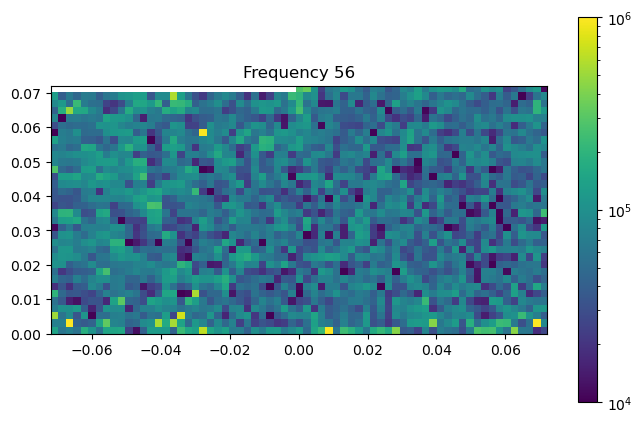

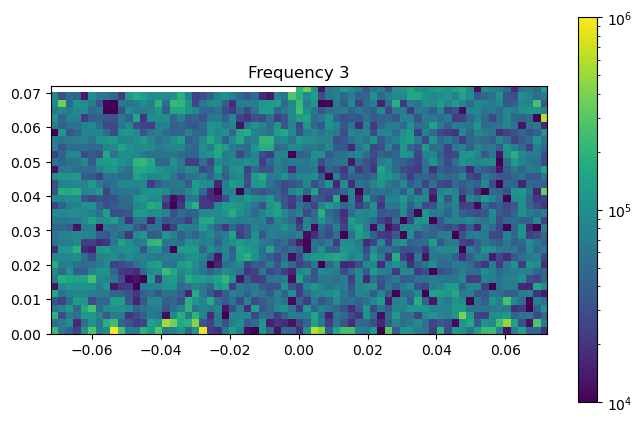

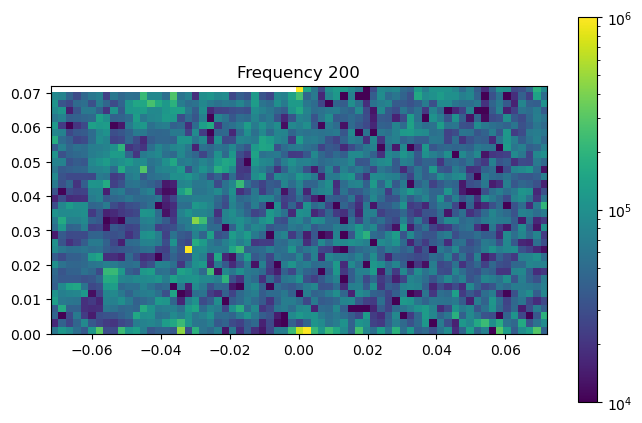

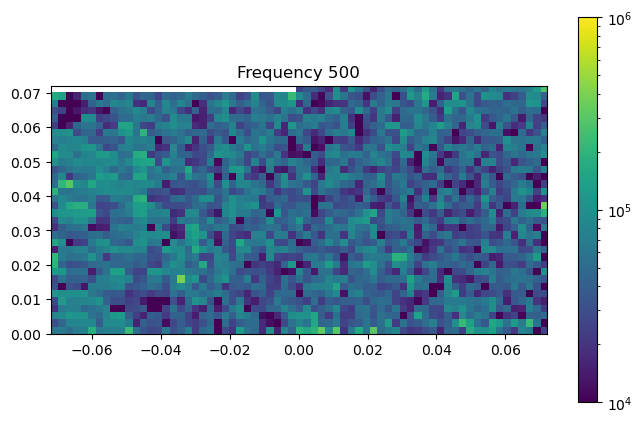

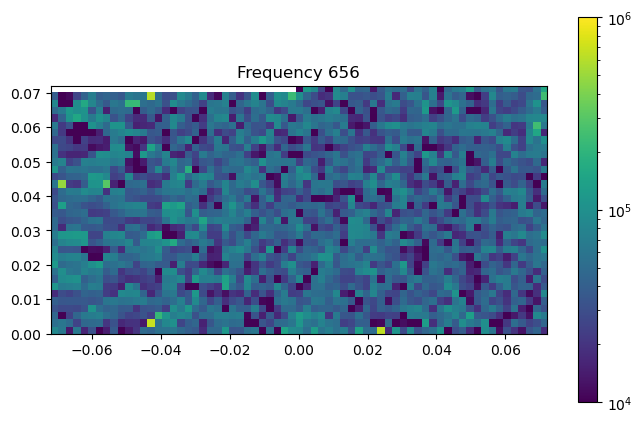

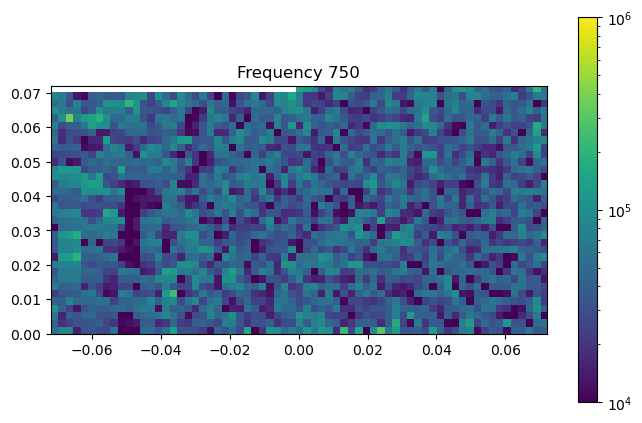

In [23]:
freqs = [56, 3, 200, 500, 656, 750]

print(f'Plotting data sum from the Obs 384 XX Dirty Data Sum')
for i, x in enumerate (freqs):
    plot_data_sum(0, x)

In [19]:
def plot_704_TV_ws(s, x, y):
    fig,ax = plt.subplots(1,1) 
    fig.set_size_inches(8, 5)

    plt.imshow(np.mean(np.abs(data_704_ws[s]['data_sum'][x:y,:,:]), axis = 0), extent = [data_704_ws[0]['kx_mpc'][0], data_704_ws[0]['kx_mpc'][-1],data_704_ws[0]['ky_mpc'][0], data_704_ws[0]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    plt.colorbar()
    if y == 350:
        plt.title(f'Average for TV Band 6 with SSINS')
    elif y == 525:
        plt.title(f'Average for TV Band 7 with SSINS')
    elif y == 700:
        plt.title(f'Average for TV Band 8 with SSINS')
    else:
        plt.title(f'Average for TV Band 9 with SSINS')

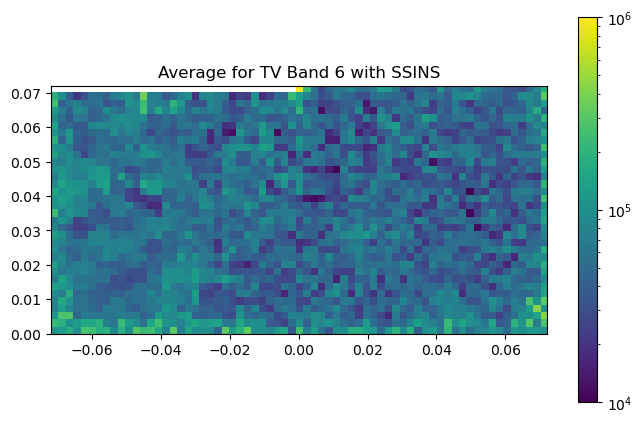

In [25]:
plot_704_TV_ws(0, 174, 350)

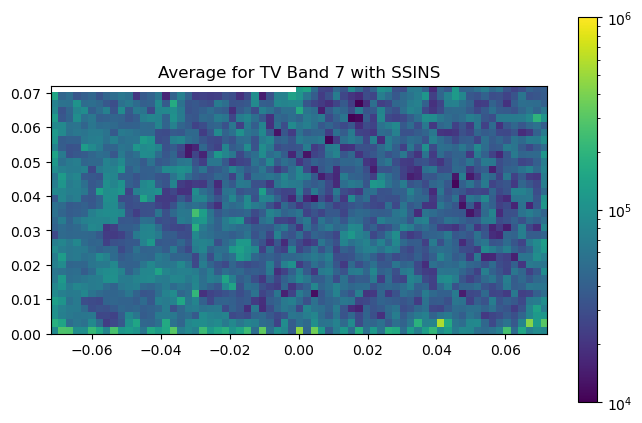

In [26]:
plot_704_TV_ws(0, 349, 525)

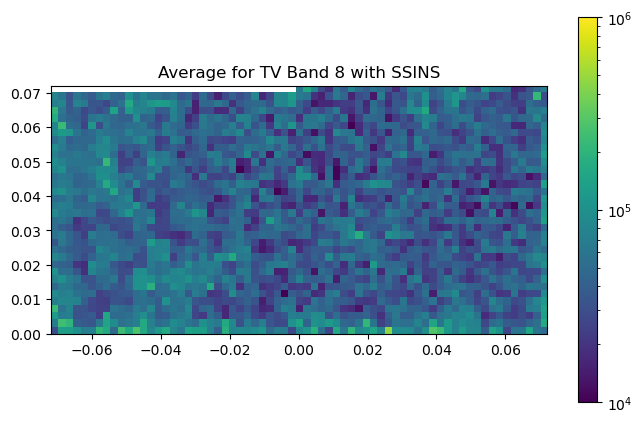

In [27]:
plot_704_TV_ws(0, 524, 700)

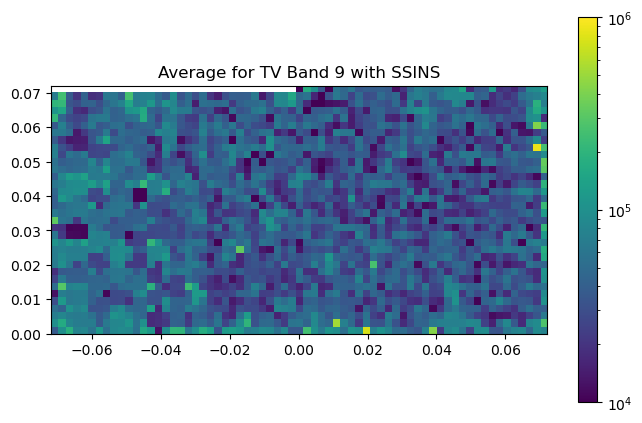

In [28]:
plot_704_TV_ws(0, 700, 752)

In [20]:
def plot_704_TV_wos(s, x, y):
    fig,ax = plt.subplots(1,1) 
    fig.set_size_inches(8, 5)

    plt.imshow(np.mean(np.abs(data_704_wos[s]['data_sum'][x:y,:,:]), axis = 0), extent = [data_704_wos[0]['kx_mpc'][0], data_704_wos[0]['kx_mpc'][-1],data_704_wos[0]['ky_mpc'][0], data_704_wos[0]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    plt.colorbar()
    if y == 350:
        plt.title(f'Average for TV Band 6 without SSINS')
    elif y == 525:
        plt.title(f'Average for TV Band 7 without SSINS')
    elif y == 700:
        plt.title(f'Average for TV Band 8 without SSINS')
    else:
        plt.title(f'Average for TV Band 9 without SSINS')

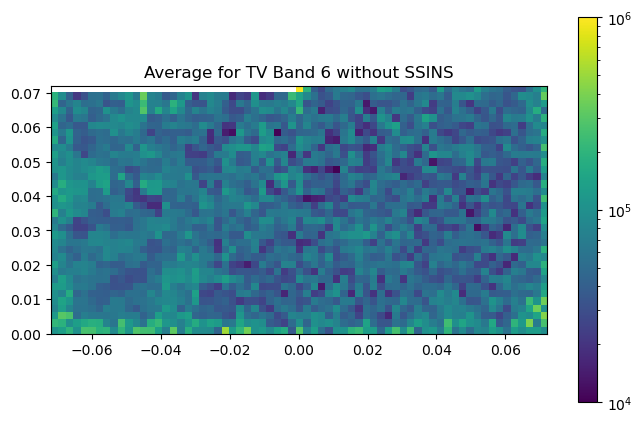

In [30]:
plot_704_TV_wos(0, 174, 350)

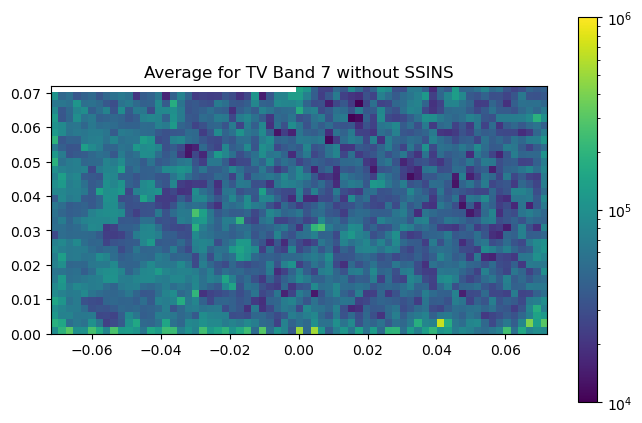

In [31]:
plot_704_TV_wos(0, 349, 525)

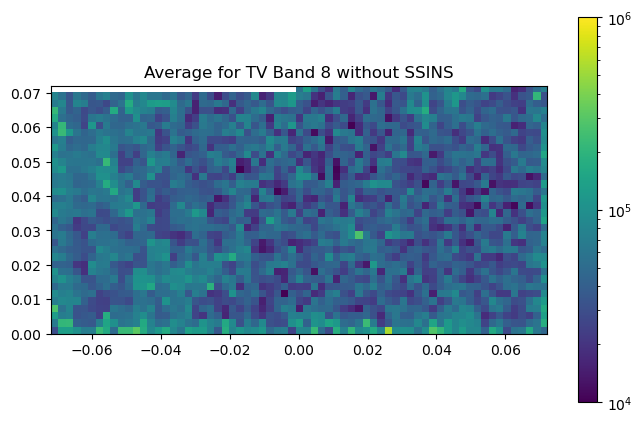

In [32]:
plot_704_TV_wos(0, 524, 700)

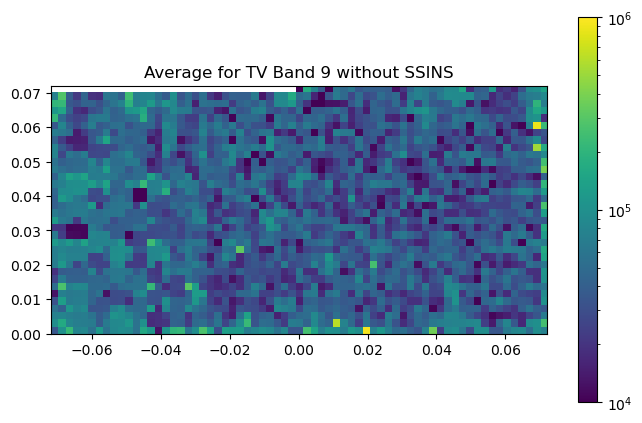

In [33]:
plot_704_TV_wos(0, 699, 752)

In [21]:
def plot_both_704TV(s, x, y):
    fig,ax = plt.subplots(1,3) 
    fig.set_size_inches(20, 15)

    pos = ax[0].imshow(np.mean(np.abs(data_704_ws[s]['data_sum'][x:y,:,:]), axis = 0), extent = [data_704_ws[s]['kx_mpc'][0], data_704_ws[s]['kx_mpc'][-1],data_704_ws[s]['ky_mpc'][0], data_704_ws[s]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    fig.colorbar(pos, ax=ax[0],shrink=0.25)
    if y == 350:
        ax[0].set_title(f'Obs 704 avg for TV Band 6 w SSINS')
    elif y == 525:
        ax[0].set_title(f'Obs 704 avg for TV Band 7 w SSINS')
    elif y == 700:
        ax[0].set_title(f'Obs 704 avg for TV Band 8 w SSINS')
    else:
        ax[0].set_title(f'Obs 704 avg for TV Band 9 w SSINS')

    pos1 = ax[1].imshow(np.mean(np.abs(data_704_wos[s]['data_sum'][x:y,:,:]), axis = 0), extent = [data_704_wos[s]['kx_mpc'][0], data_704_wos[s]['kx_mpc'][-1],data_704_wos[s]['ky_mpc'][0], data_704_wos[s]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log',vmin = 10e3, vmax = 1e6)
    fig.colorbar(pos1, ax=ax[1],shrink=0.25)
    if y == 350:
        ax[1].set_title(f'Obs 704 avg for TV Band 6 w/o SSINS')
    elif y == 525:
        ax[1].set_title(f'Obs 704 avg for TV Band 7 w/o SSINS')
    elif y == 700:
        ax[1].set_title(f'Obs 704 avg for TV Band 8 w/o SSINS')
    else:
        ax[1].set_title(f'Obs 704 avg for TV Band 9 w/o SSINS')    

    mean_ws = np.mean(np.abs(data_704_ws[s]['data_sum'][x:y,:,:]), axis = 0)
    mean_wos = np.mean(np.abs(data_704_wos[s]['data_sum'][x:y,:,:]), axis = 0)
    difference = mean_wos - mean_ws    
    
    pos2 = ax[2].imshow(difference, extent = [data_704_wos[s]['kx_mpc'][0], data_704_wos[s]['kx_mpc'][-1],data_704_wos[s]['ky_mpc'][0], data_704_wos[s]['ky_mpc'][-1]],
                                                                aspect = 'equal', norm = 'log')
    fig.colorbar(pos2, ax=ax[2],shrink=0.25)
    if y == 350:
        ax[2].set_title(f'Difference for TV Band 6')
    elif y == 525:
        ax[2].set_title(f'Difference for TV Band 7')
    elif y == 700:
        ax[2].set_title(f'Difference for TV Band 8')
    else:
        ax[2].set_title(f'Difference for TV Band 9')    


## Plots for Dirty

### TV Band 6

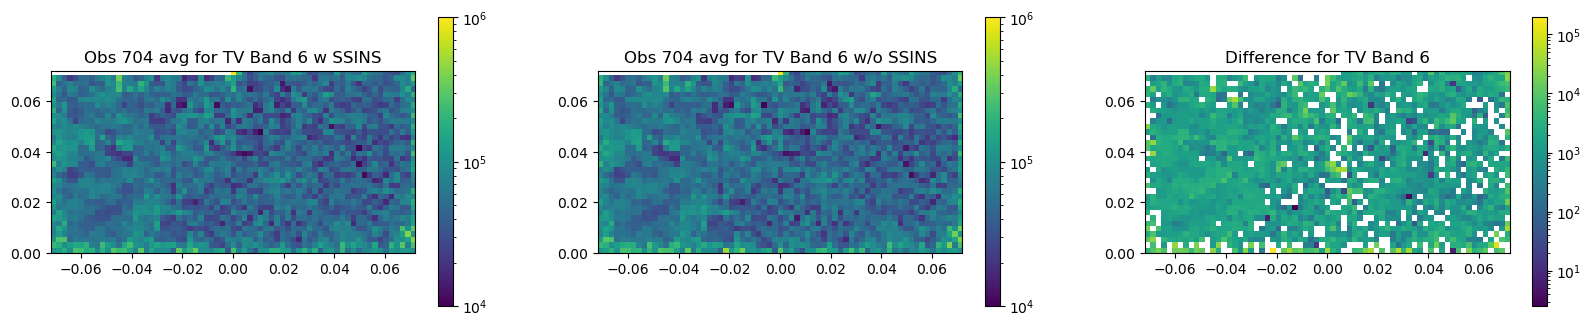

In [32]:
#XX
plot_both_704TV(0, 174, 350)

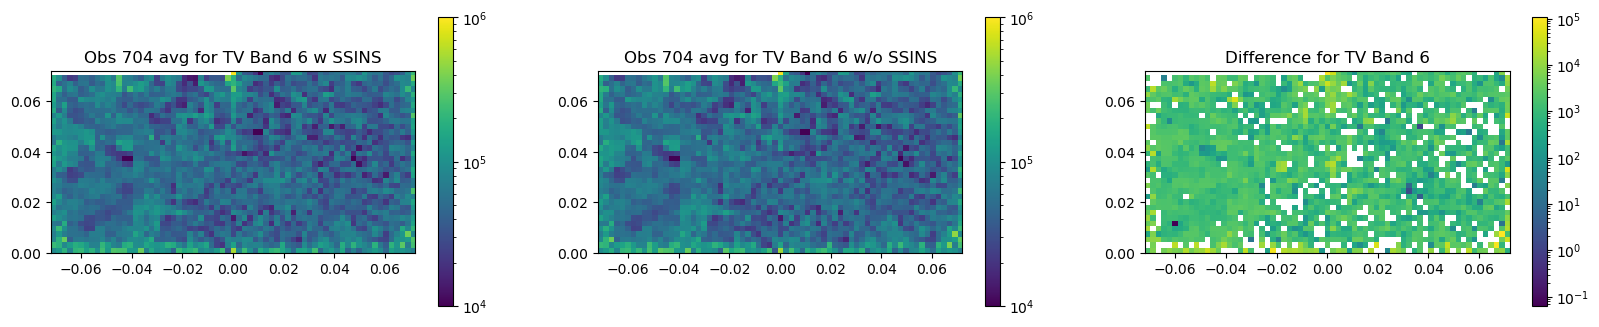

In [33]:
#YY
plot_both_704TV(1, 174, 350)

### TV Band 7

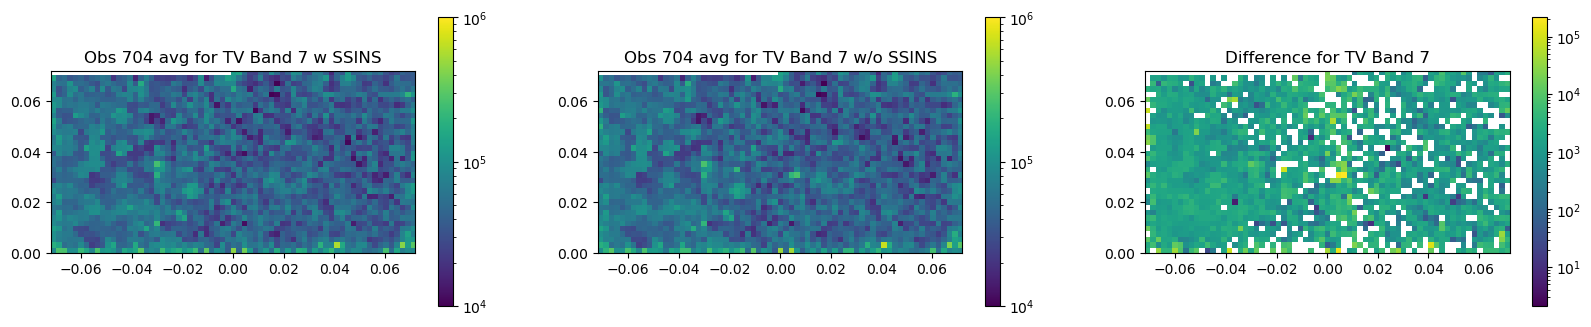

In [34]:
#XX
plot_both_704TV(0, 349, 525)

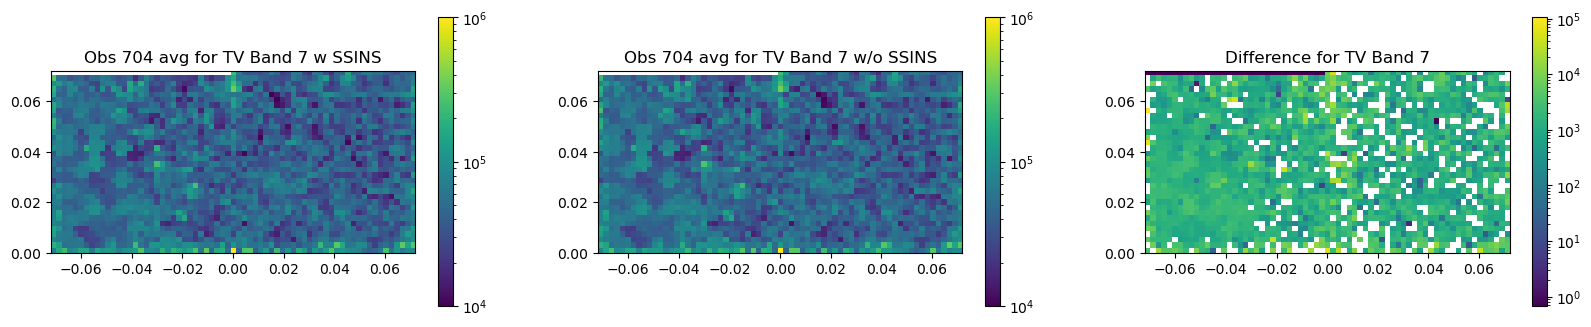

In [36]:
#YY
plot_both_704TV(1, 349, 525)

### TV Band 8

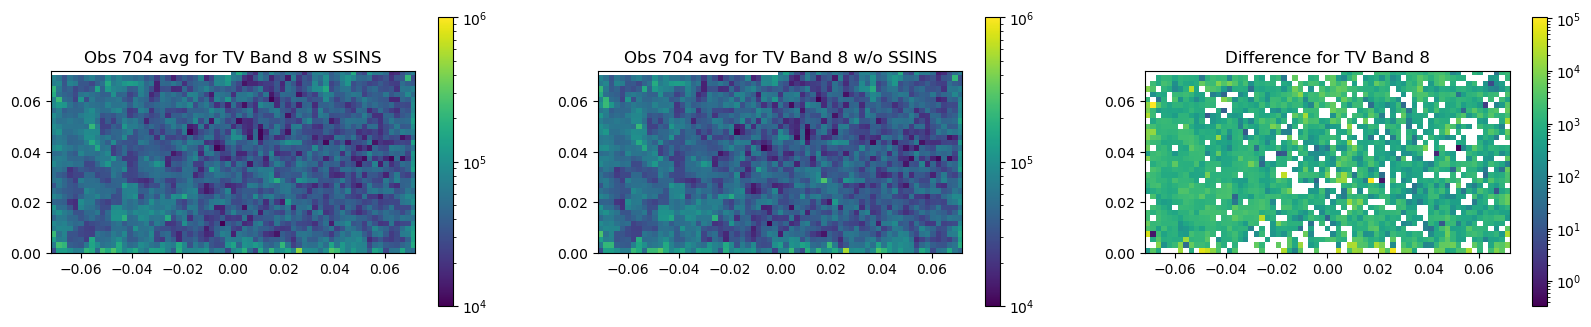

In [37]:
#XX
plot_both_704TV(0, 524, 700)

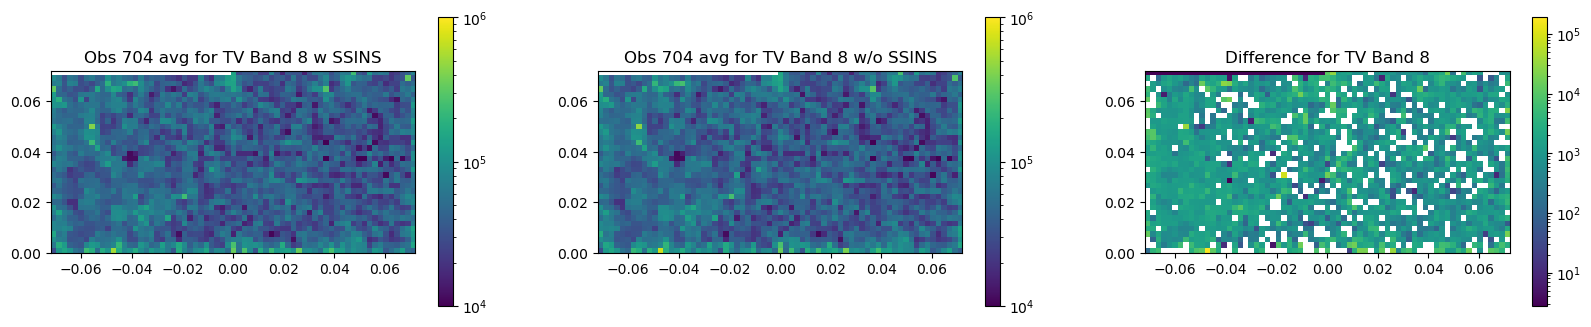

In [38]:
#YY
plot_both_704TV(1, 524, 700)

### TV Band 9

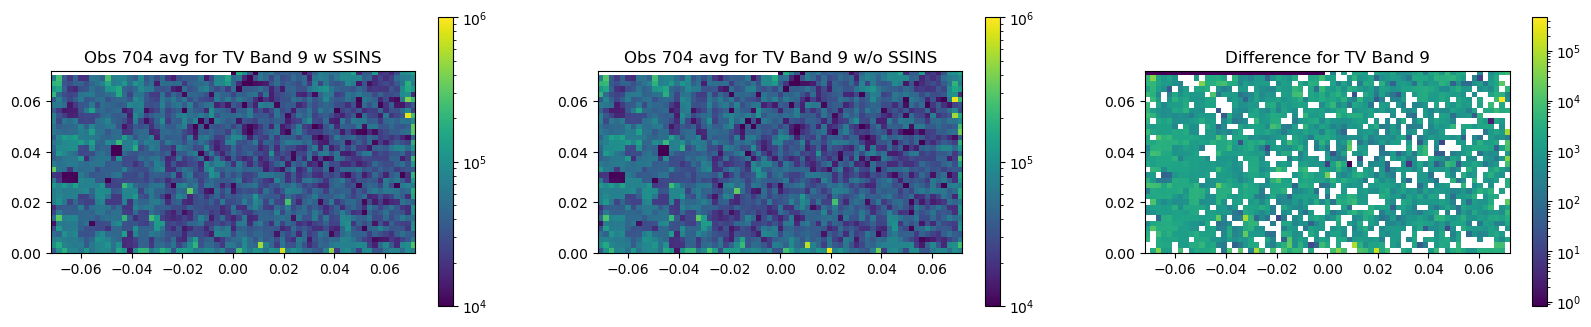

In [39]:
#XX
plot_both_704TV(0, 699, 752)

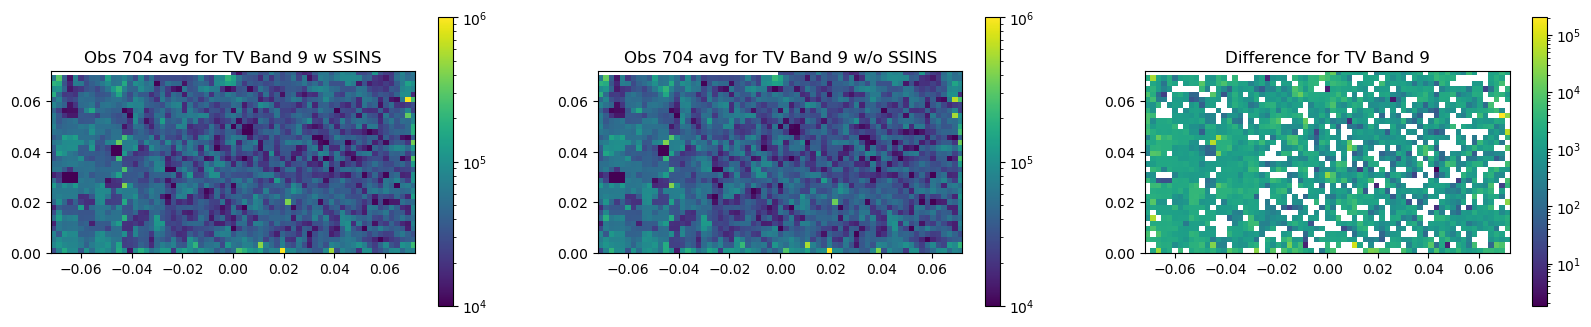

In [40]:
#YY
plot_both_704TV(1, 699, 752)

## Residuals

### TV Band 6

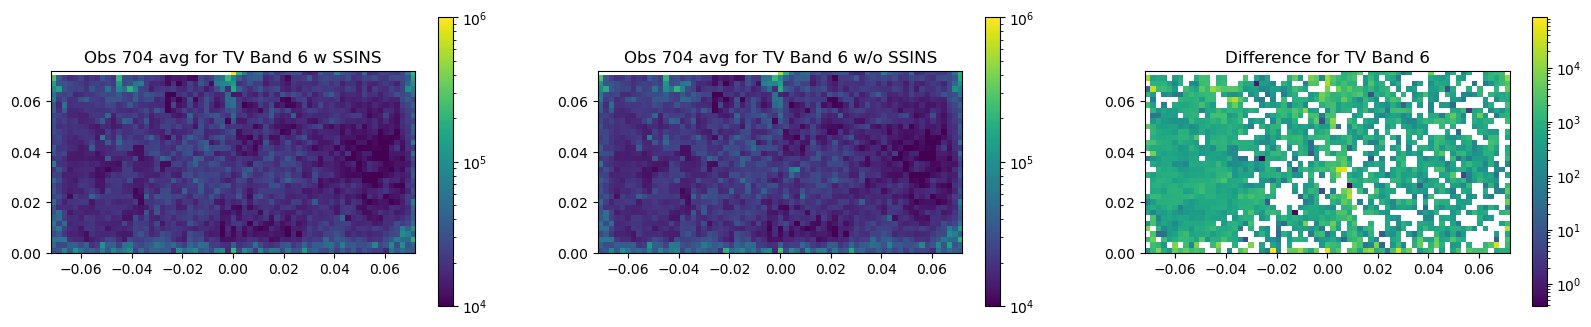

In [41]:
#XX
plot_both_704TV(4, 174, 350)

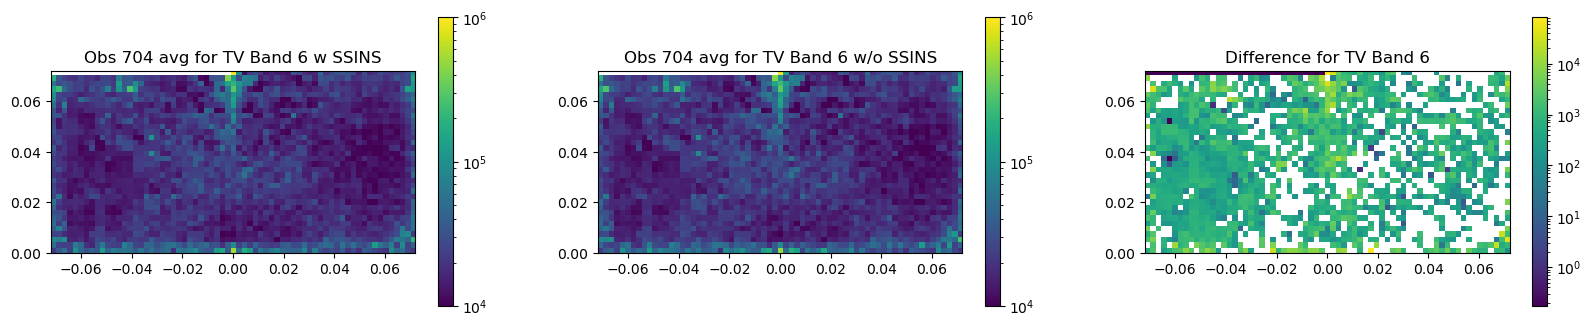

In [42]:
#YY
plot_both_704TV(5, 174, 350)

### TV Band 7

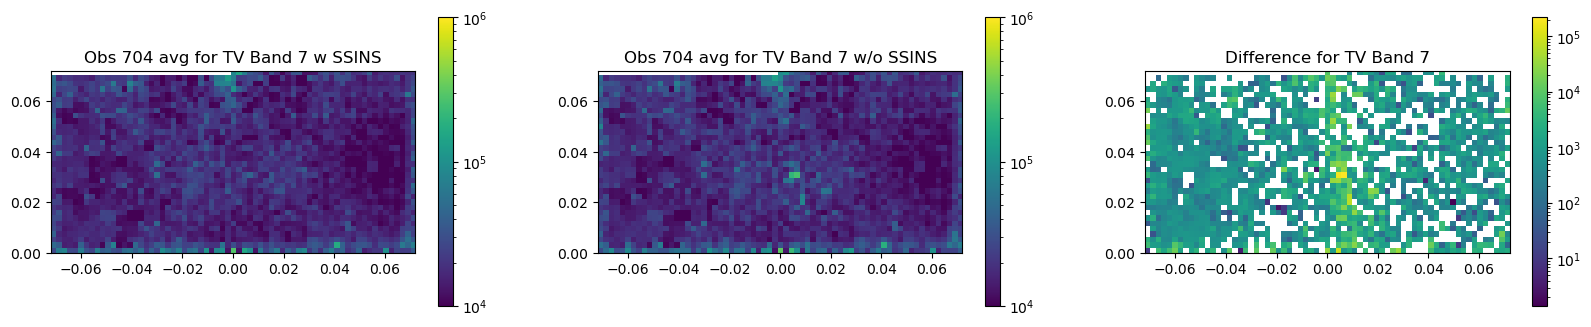

In [45]:
#XX
plot_both_704TV(4, 349, 525)

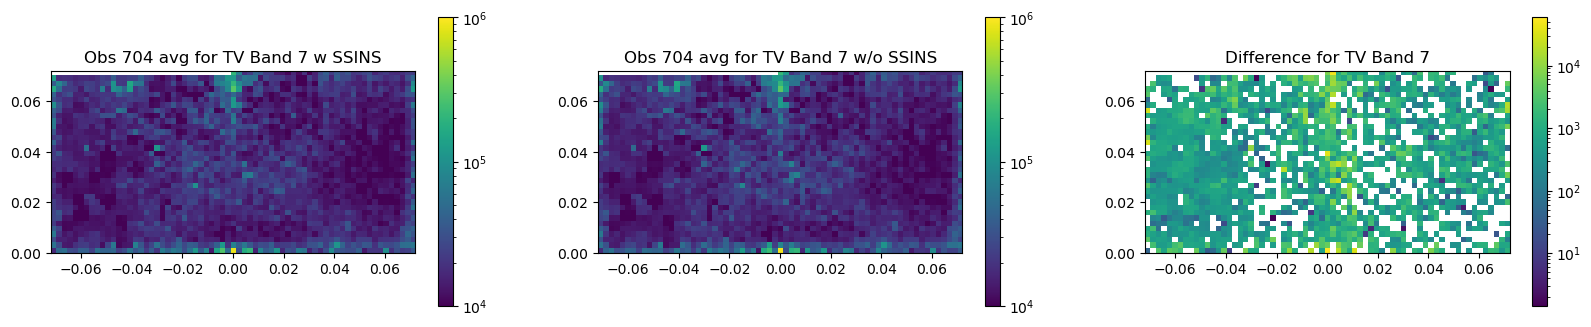

In [47]:
#YY
plot_both_704TV(5, 349, 525)

### TV Band 8

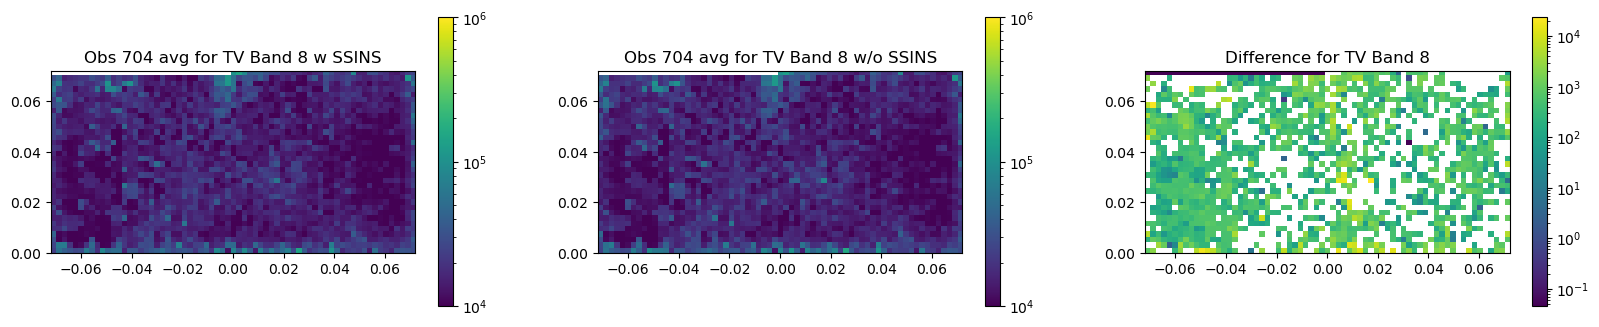

In [48]:
#XX
plot_both_704TV(4, 524, 700)

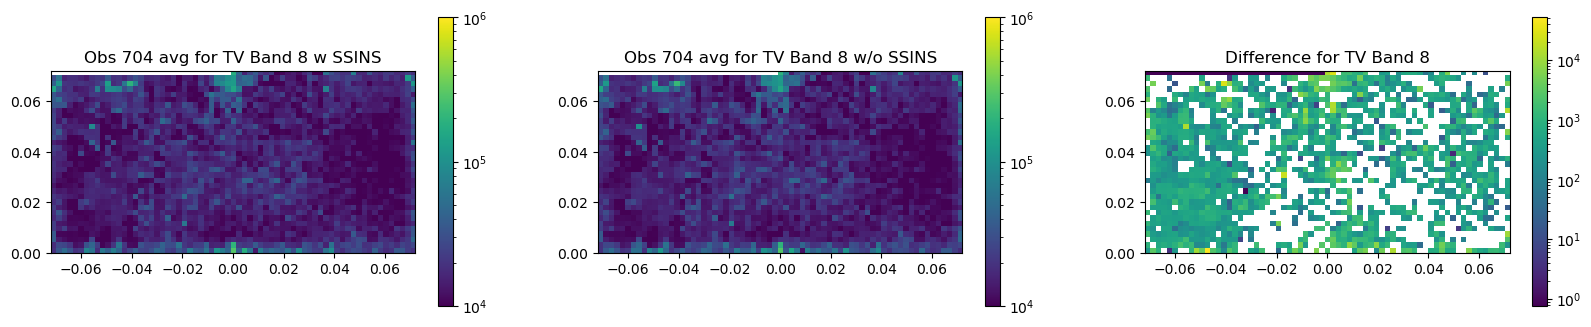

In [49]:
#YY
plot_both_704TV(5, 524, 700)

### TV Band 9

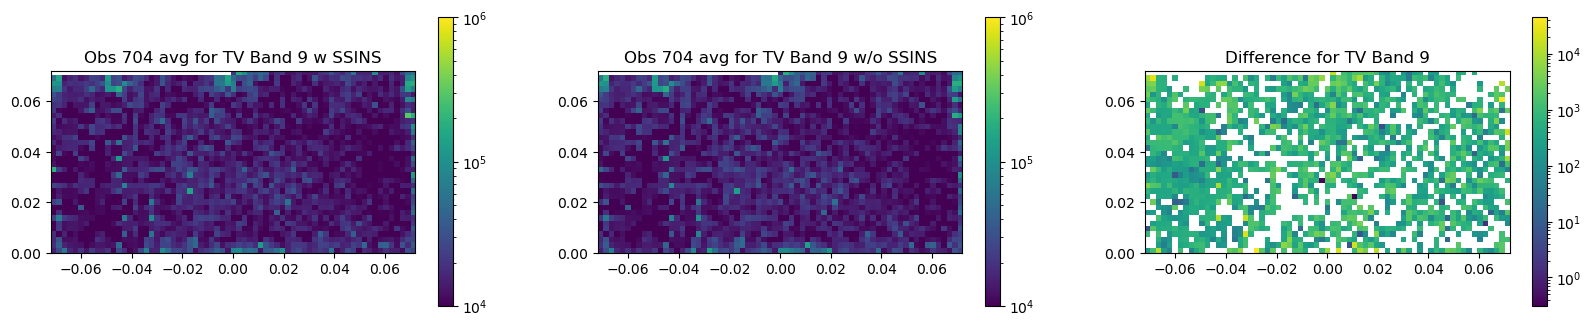

In [50]:
#XX
plot_both_704TV(4, 699, 752)

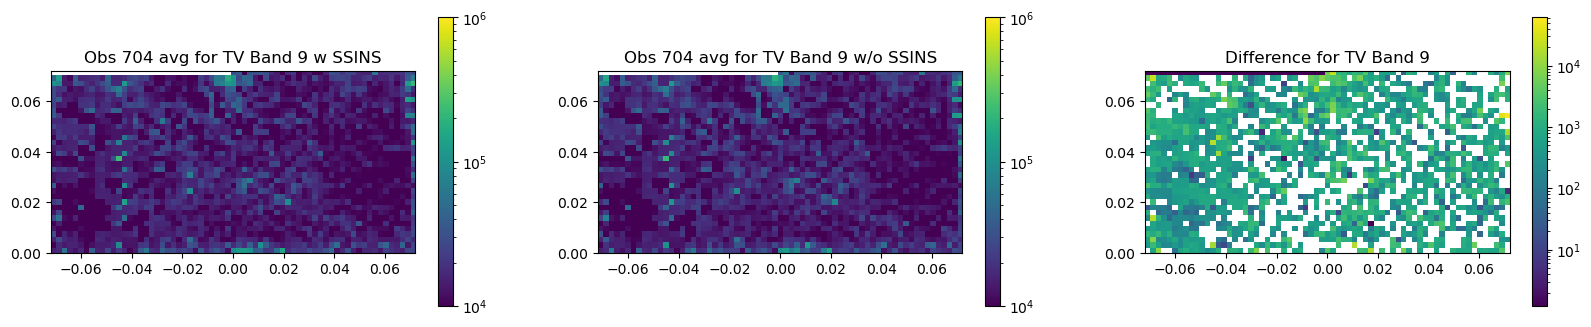

In [51]:
#YY
plot_both_704TV(5, 699, 752)